In [1]:
import pandas as pd
import numpy as np

In [2]:
from preprocessing import preprocess

In [3]:
joined = preprocess(5, 6, True)

/home/linda/PycharmProjects/bp-project/randomforest/preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeros.drop(["_merge"], axis=1, inplace=True)


In [4]:
joined

0  1  2  3  4  5  6  7  8  9  ... 31 32 33 34 35 36 37 38 39  \
0       G  G  A  G  G  T  T  G  G  T  ...  A  T  T  A  C  T  G  G  G   
1       G  G  G  G  A  T  C  G  G  A  ...  A  G  G  G  T  G  G  T  G   
2       G  G  G  G  A  T  C  G  G  A  ...  A  G  G  G  T  G  G  T  G   
3       T  A  T  C  G  G  C  C  G  A  ...  G  G  G  A  T  G  G  C  A   
4       A  A  G  T  G  G  A  T  G  G  ...  C  T  G  G  A  C  G  A  T   
...    .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. ..   
891909  C  G  G  G  T  T  G  G  G  G  ...  T  C  G  G  T  T  G  G  G   
891910  T  G  G  G  G  G  T  G  G  G  ...  C  T  T  A  C  T  G  G  C   
891911  G  C  G  G  A  G  G  G  G  G  ...  G  G  T  G  G  G  C  G  G   
891912  T  T  G  G  C  C  A  A  G  C  ...  A  T  G  C  C  T  G  G  G   
891913  T  G  C  A  C  C  A  A  A  G  ...  G  G  G  T  G  G  G  C  A   

       occurrence_y  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
891909            0  
891910            0  
891911            0  
891912            0  
891913            0  

[1628213 rows x 41 columns]

In [5]:
joined_matrix = [[[0] * 40 for i in range(4)] for n in range(len(joined))]
print(np.array(joined_matrix).shape)

(1628213, 4, 40)


In [6]:
joined.reset_index(inplace=True)

for index, row in joined.iterrows():
    x = 0
    for i in row:
        if (i == 'A'):
            joined_matrix[index][0][x] = 1
        elif (i == 'C'):
            joined_matrix[index][1][x] = 1
        elif (i == 'G'):
            joined_matrix[index][2][x] = 1
        elif (i == 'T'):
            joined_matrix[index][3][x] = 1
        else:
            continue
        x += 1

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(joined_matrix, joined.occurrence_y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) 

In [8]:
num_samples, timesteps, features = np.asarray(x_train).shape
x_train_2d = np.asarray(x_train).reshape(num_samples, timesteps * features)

In [9]:
num_samples, timesteps, features = np.asarray(x_val).shape
x_val_2d = np.asarray(x_val).reshape(num_samples, timesteps * features)

In [10]:
num_samples, timesteps, features = np.asarray(x_test).shape
x_test_2d = np.asarray(x_test).reshape(num_samples, timesteps * features)

In [11]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
val = []
train = []
trees = range(1,50)
for tree in trees:
    rf = RandomForestClassifier(n_estimators=tree, random_state=42)
    rf.fit(x_train_2d, y_train)
    train.append(rf.score(x_train_2d, y_train))
    val.append(rf.score(x_val_2d, y_val))

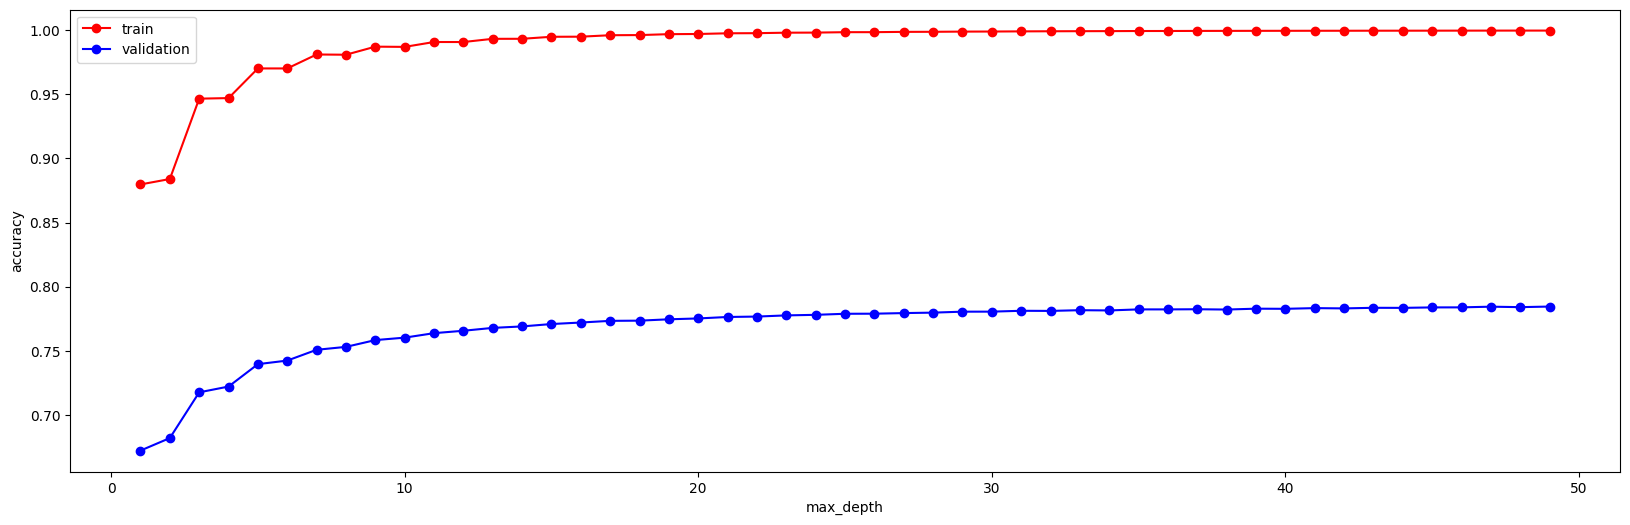

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(trees, train,'or-')
plt.plot(trees, val,'ob-')
plt.xlabel('number of trees in the forest')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [13]:
optimal = np.argmax(val) + 1
optimal

49

In [14]:
#from sklearn.metrics import mean_squared_error
rf = RandomForestClassifier(n_estimators=optimal, random_state=42)
rf.fit(x_train_2d, y_train)
print(rf.score(x_test_2d, y_test))

0.7844541414985122
